In [1]:
%pylab inline
data_dir = "Weather/"

Populating the interactive namespace from numpy and matplotlib


In [2]:
!curl -o $data_dir/STAT.pickle http://mas-dse-open.s3.amazonaws.com/Weather/STAT.pickle

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0 77.8M    0  127k    0     0  70329      0  0:19:21  0:00:01  0:19:20 70901
  2 77.8M    2 2367k    0     0   832k      0  0:01:35  0:00:02  0:01:33  836k
  9 77.8M    9 7400k    0     0  1925k      0  0:00:41  0:00:03  0:00:38 1932k
 15 77.8M   15 11.8M    0     0  2511k      0  0:00:31  0:00:04  0:00:27 2519k
 22 77.8M   22 17.1M    0     0  3011k      0  0:00:26  0:00:05  0:00:21 4080k
 26 77.8M   26 20.8M    0     0  3088k      0  0:00:25  0:00:06  0:00:19 4197k
 33 77.8M   33 26.2M    0     0  3420k      0  0:00:23  0:00:07  0:00:16 4892k
 39 77.8M   39 30.3M    0     0  3518k      0  0:00:22  0:00:08  0:00:14 4743k
 45 77.8M   45 35.6M    0     0  3710k      0  0:00

In [2]:
import pickle
STAT,STAT_description=pickle.load(open(data_dir+'/STAT.pickle','r'))

In [3]:
Scalars=['mean','std','low1000','low100','high100','high1000']
for meas in STAT.keys():
    !grep $meas 'Weather/ghcnd-readme.txt'
    S=STAT[meas]
    for scalar in Scalars:
        print '%s:%f'%(scalar,S[scalar]),
    print

mean:44.531018 std:109.933072 low1000:-350.000000 low100:-245.000000 high100:239.000000 high1000:278.000000


grep: 'Weather/ghcnd-readme.txt': No such file or directory


mean:113.582223 std:119.255224 low1000:-267.000000 low100:-167.000000 high100:339.000000 high1000:389.000000


grep: 'Weather/ghcnd-readme.txt': No such file or directory


mean:175.823101 std:123.742076 low1000:-233.000000 low100:-122.000000 high100:383.000000 high1000:433.000000


grep: 'Weather/ghcnd-readme.txt': No such file or directory


mean:2.126900 std:24.160393 low1000:0.000000 low100:0.000000 high100:76.000000 high1000:254.000000


grep: 'Weather/ghcnd-readme.txt': No such file or directory


mean:21.454498 std:123.727039 low1000:0.000000 low100:0.000000 high100:508.000000 high1000:1676.000000


grep: 'Weather/ghcnd-readme.txt': No such file or directory


mean:24.277398 std:100.174134 low1000:0.000000 low100:0.000000 high100:356.000000 high1000:830.000000


grep: 'Weather/ghcnd-readme.txt': No such file or directory


In [4]:
def YearlyPlots(T,ttl='',yl='',xl='',y=None,x=None,size=(10,7),colour='b'):
    yearday=[i for i in range(1,366)]
    fig=figure(1,figsize=size,dpi=300)
    if shape(T)[0] != 365:
        raise ValueError("First dimension of T should be 365. Shape(T)="+str(shape(T)))
    plot_date(yearday,T, '-',color=colour);
    # rotate and align the tick labels so they look better
    #fig.autofmt_xdate()
    ylabel(yl)
    xlabel(xl)
    if y is not None:
        ylim(y)
    if x is not None:
        xlim(x)
    grid()
    title(ttl)

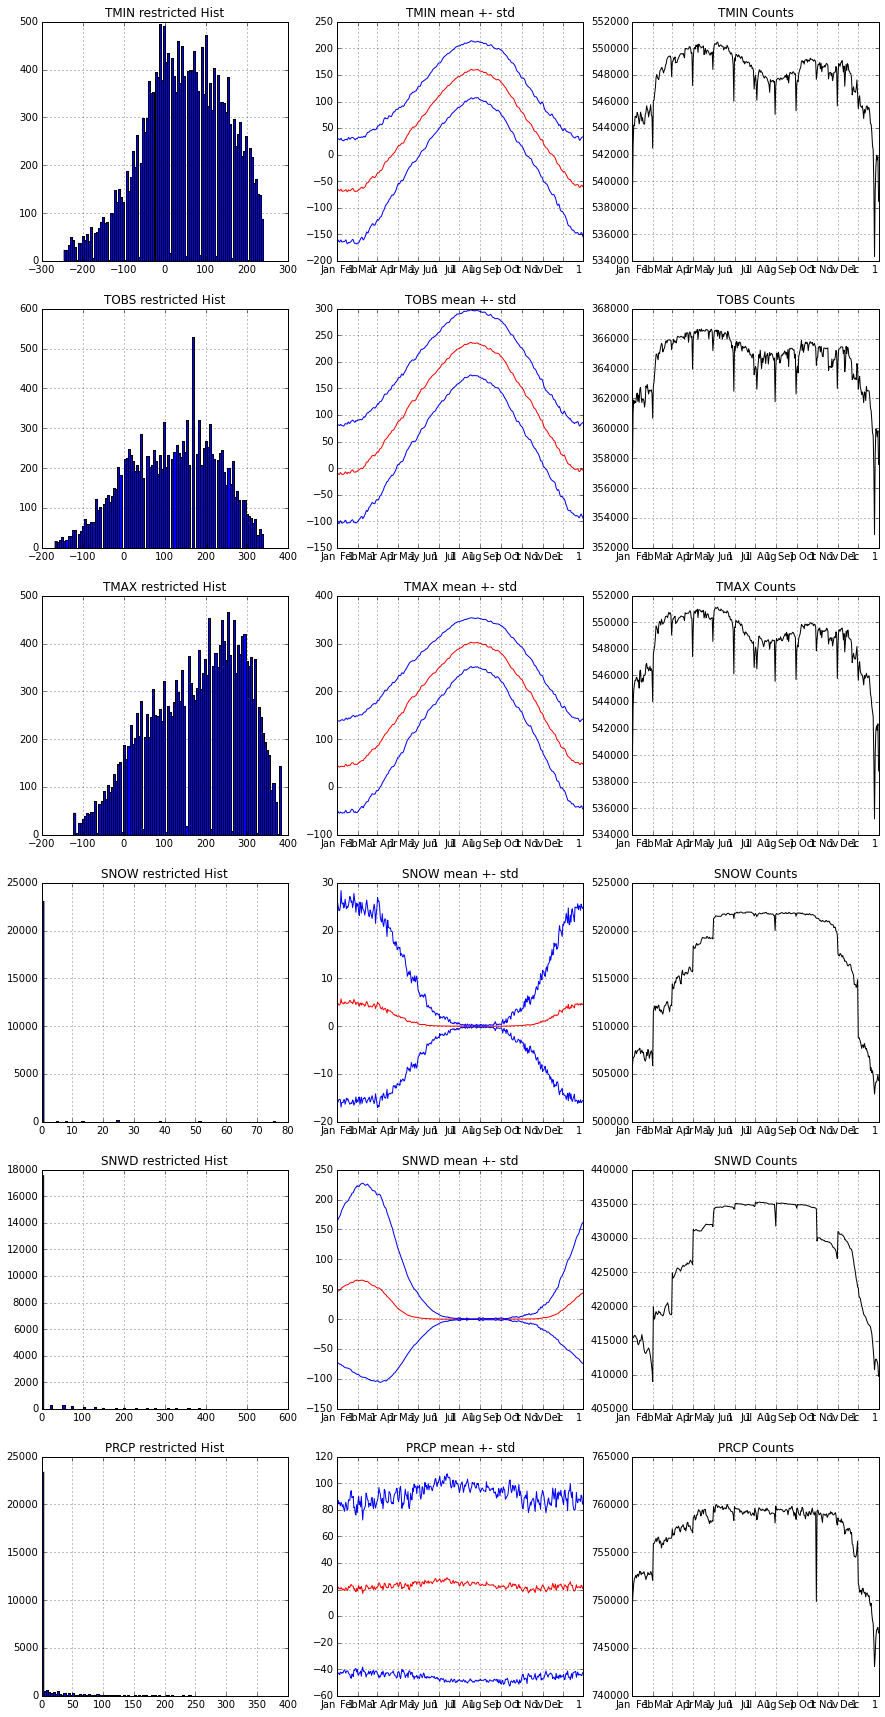

In [5]:
figure(figsize=(15,30))
offset=1
for meas in STAT.keys():
    subplot(6,3,offset)
    offset+=1
    ## Your code for Histogram
    histarray = [i for i in STAT[meas]['SortedVals'] if i>=STAT[meas]['low100'] and i<=STAT[meas]['high100']]
    pylab.hist(histarray, bins=100)
    grid()
    pylab.title(meas + " restricted Hist")
    subplot(6,3,offset)
    offset+=1
    ## Your code for mean and mean +- std
    YearlyPlots(STAT[meas]['Mean'],colour='r')
    noofdays = len(STAT[meas]['Mean'])
    YearlyPlots([STAT[meas]['Mean'][i] + sqrt(STAT[meas]['Var'][i]) for i in xrange(noofdays)],colour='b')
    YearlyPlots([STAT[meas]['Mean'][i] - sqrt(STAT[meas]['Var'][i]) for i in xrange(noofdays)],colour='b',ttl=meas + ' mean +- std')
    subplot(6,3,offset)
    offset+=1
    ## Your code for number of measurements
    YearlyPlots(STAT[meas]['NE'],colour='k',ttl = meas+' Counts')
    

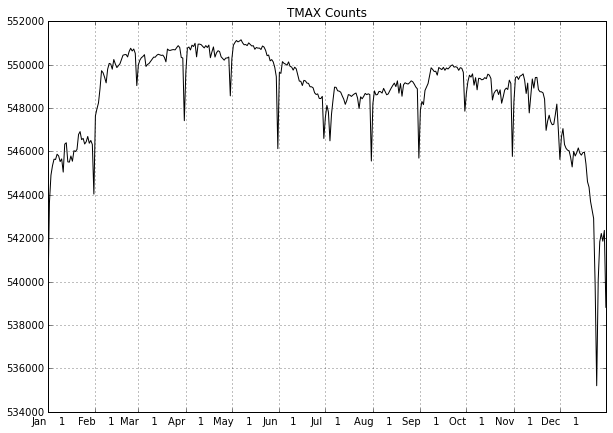

In [6]:
    meas = 'TMAX'
    YearlyPlots(STAT[meas]['NE'],colour='k',ttl = meas+' Counts')
    
    


'\nI have used the parquet data from the TA to plot the TMAX counts for station "USR0000CBOG" for all the years per each day as shown\nin the first plot. The plot shows a dip at the end of months of many months such as June, Sept, Nov and Jan. \nThis is a result of the maintenance schedule followed by the stations due the end of a month. During this period, the machines \nare turned off for any repairs thereby reducing the machine active times and hence number of counts.\n\nYes the same trend is observed across multiple stations.\n\nThis effect can be reduced by sampling the days picked instead of picking all the 365 days thereby making it less probable for \npicking the days at the end of the month.\n'

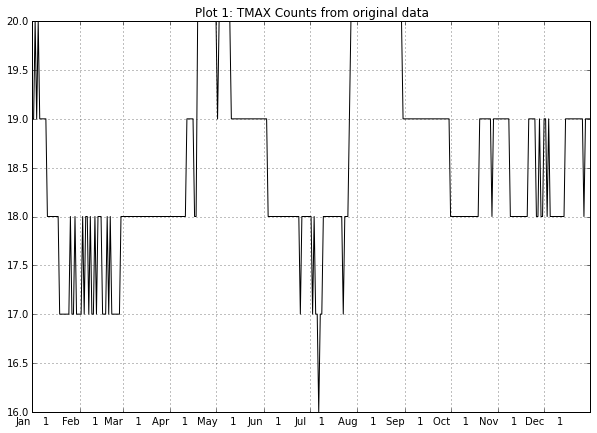

In [33]:
##Extra Credit Question

#1st Question

STAT_new=pickle.load(open(data_dir+'/tmax_all_stations.pickle','r'))
meas = 'TMAX'

YearlyPlots(STAT_new[2][1],colour='k',ttl = 'Plot 1: ' + meas+' Counts from original data')

"""
I have used the parquet data from the TA to plot the TMAX counts for station "USR0000CBOG" for all the years per each day as shown
in the first plot. The plot shows a dip at the end of months of many months such as June, Sept, Nov and Jan. 
This is a result of the maintenance schedule followed by the stations due the end of a month. During this period, the machines 
are turned off for any repairs thereby reducing the machine active times and hence number of counts.

Yes the same trend is observed across multiple stations.

This effect can be reduced by sampling the days picked instead of picking all the 365 days thereby making it less probable for 
picking the days at the end of the month.
"""

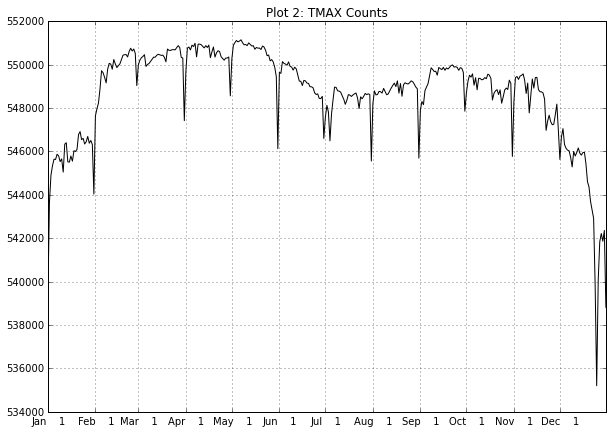

In [31]:
##Extra Credit Question

#1st Question Continued

"""
From plot 2 of TMAX Counts, It is observed from the count plot that more number of readings have been recorded during the mid of 
the year than when compared during the end and starting of the year. This is majorly due to the fact that these machines undergo 
stress and breakdown more during low temperatures which is prominent during the months of Nov-March. 
Hence a lot of times the machines are turned off for maintenance during Nov-Feb thereby reducing their active 
machine times causing lower no. of readings taken than when compared to the more weather friendly months of March-Oct.
Particularly, in Dec, due to the holiday season, the machine are run less actively due to the reduction in available man hours
for repair, monitoring and maintenence and hence the huge dip in counts in Dec.

Also there is a dip at the end of every month which depicts that there is a monthly maintenance policy that occurs during the 
end of each month thereby reducing active machine times during those periods.
"""

meas = 'TMAX'
plt.figure(2)
YearlyPlots(STAT[meas]['NE'],colour='k',ttl = 'Plot 2: ' + meas+' Counts')

'\nFrom plot 3, it is observed from the count plot below of SNWD (Snow Depth) that more number of readings have been recorded during\nthe mid of the year than when compared during the end and starting of the year. This is majorly due to the fact that these \nmachines that particularly measure snow depth undergo stress and breakdown more during low temperatures which is prominent \nduring the months of Nov-March. Hence a lot of times the machines are turned off for maintenance during Nov-March thereby \nreducing their active machine times causing lower no. of readings taken than when compared to the more weather friendly months \nof April-Oct.\n\nAlso there is a dip at the end of every month which depicts that there is a monthly maintenance policy that occurs during the \nend of each month thereby reducing active machine times during those periods.\n'

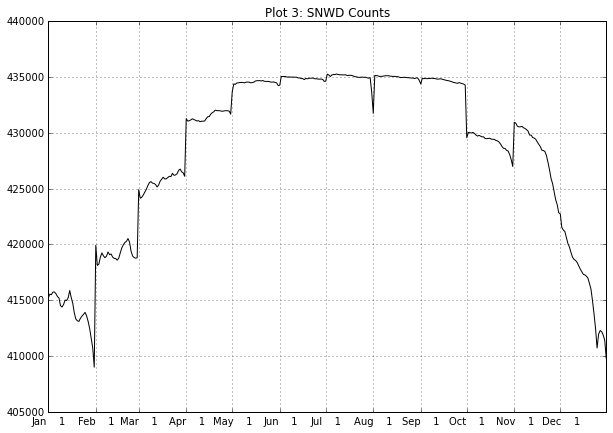

In [32]:
##Extra Credit Question

#2nd Question
meas = 'SNWD'
YearlyPlots(STAT[meas]['NE'],colour='k',ttl = 'Plot 3: '+ meas+' Counts')

"""
From plot 3, it is observed from the count plot below of SNWD (Snow Depth) that more number of readings have been recorded during
the mid of the year than when compared during the end and starting of the year. This is majorly due to the fact that these 
machines that particularly measure snow depth undergo stress and breakdown more during low temperatures which is prominent 
during the months of Nov-March. Hence a lot of times the machines are turned off for maintenance during Nov-March thereby 
reducing their active machine times causing lower no. of readings taken than when compared to the more weather friendly months 
of April-Oct.

Also there is a dip at the end of every month which depicts that there is a monthly maintenance policy that occurs during the 
end of each month thereby reducing active machine times during those periods.
"""

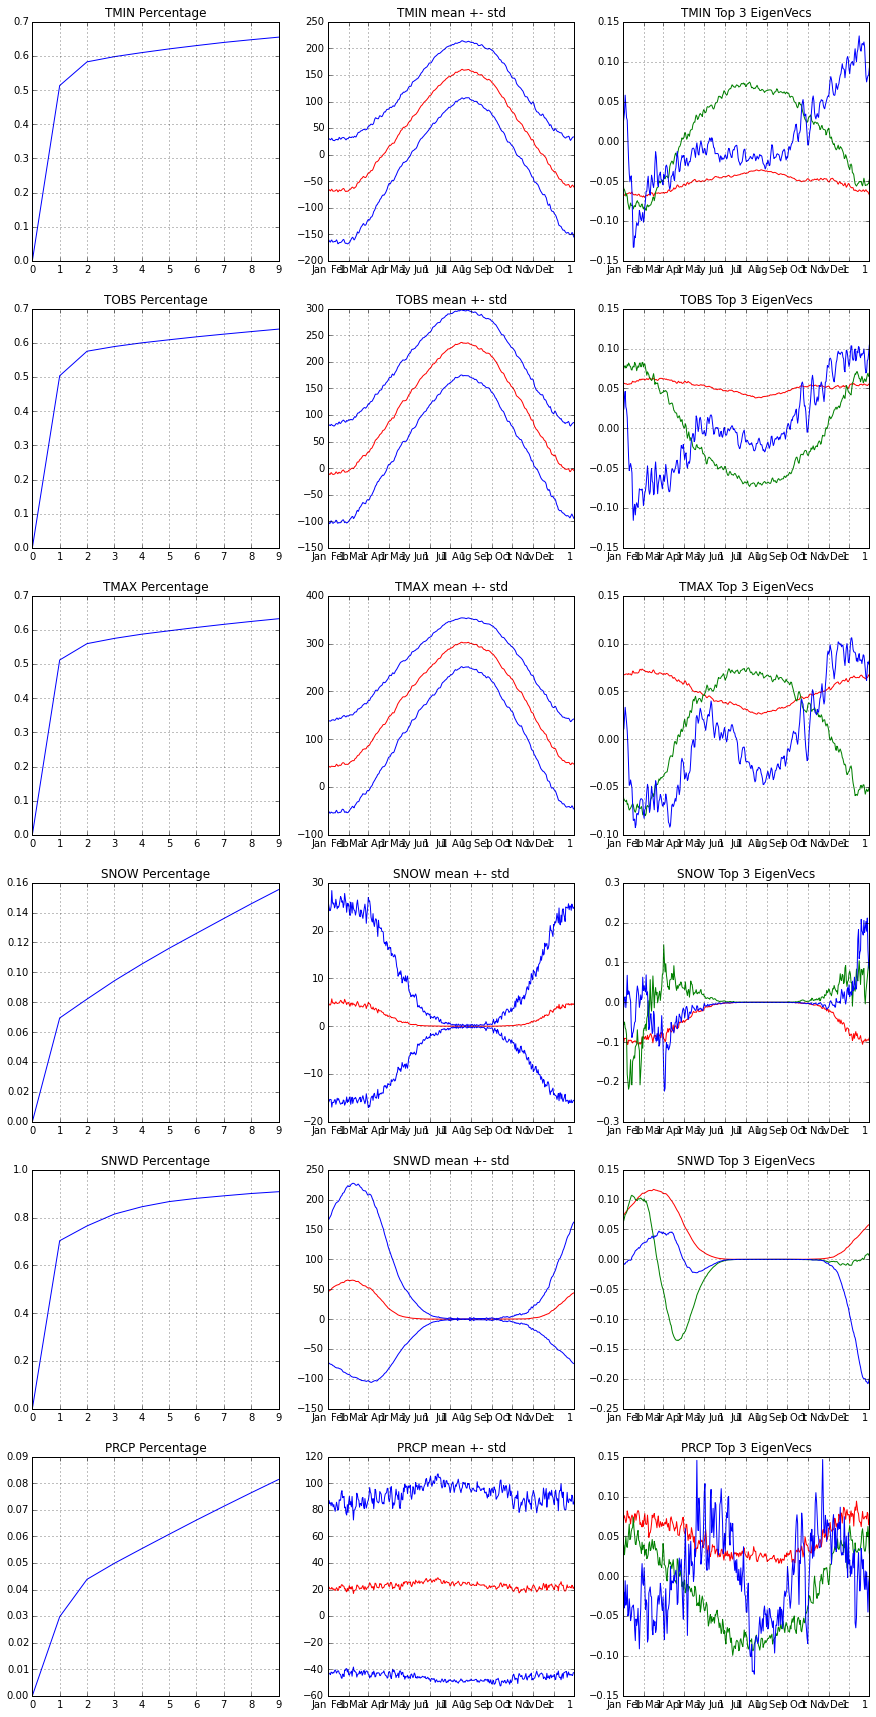

In [8]:
figure(figsize=(15,30))
offset=1
for meas in STAT.keys():
    subplot(6,3,offset)
    offset+=1
    eigsum = sum(STAT[meas]['eigval'])
    cummat = [0]
    total = 0
    for i in range(9):
        total = total + STAT[meas]['eigval'][i]
        cummat.append(total)
    cummat = [float(i)/eigsum for i in cummat]
    pylab.plot(cummat)
    grid()
    pylab.title(meas + ' Percentage')
    ## Your code for percentage of variance explained
    subplot(6,3,offset)
    offset+=1
    ## Your code for mean and mean +- std
    YearlyPlots(STAT[meas]['Mean'],colour='r')
    noofdays = len(STAT[meas]['Mean'])
    YearlyPlots([STAT[meas]['Mean'][i] + sqrt(STAT[meas]['Var'][i]) for i in xrange(noofdays)],colour='b')
    YearlyPlots([STAT[meas]['Mean'][i] - sqrt(STAT[meas]['Var'][i]) for i in xrange(noofdays)],colour='b',ttl=meas + ' mean +- std')
    subplot(6,3,offset)
    offset+=1
    ## Your code for top-3 eigenvectors
    YearlyPlots(STAT[meas]['eigvec'][:,0],colour='r')
    YearlyPlots(STAT[meas]['eigvec'][:,1],colour='g')
    YearlyPlots(STAT[meas]['eigvec'][:,2],colour='b',ttl=meas +' Top 3 EigenVecs')
